In [1]:
"""This section lists some suggestions you may consider when preparing your data for use with
LDA.
 Classification Problems. This might go without saying, but LDA is intended for
classification problems where the output variable is categorical. LDA supports both binary
and multiclass classification.
 Gaussian Distribution. The standard implementation of the model assumes a Gaussian
distribution of the input variables. Consider reviewing the univariate distributions of each
attribute and using transforms to make them more Gaussian-looking (e.g. log and root
for exponential distributions and Box-Cox for skewed distributions).
 Remove Outliers. Consider removing outliers from your data. These can skew the basic
statistics used to separate classes in LDA such the mean and the standard deviation.
 Same Variance. LDA assumes that each input variable has the same variance. It almost
always a good idea to standardize your data before using LDA so that it has a mean of 0
and a standard deviation of 1."""

'This section lists some suggestions you may consider when preparing your data for use with\nLDA.\n\x88 Classification Problems. This might go without saying, but LDA is intended for\nclassification problems where the output variable is categorical. LDA supports both binary\nand multiclass classification.\n\x88 Gaussian Distribution. The standard implementation of the model assumes a Gaussian\ndistribution of the input variables. Consider reviewing the univariate distributions of each\nattribute and using transforms to make them more Gaussian-looking (e.g. log and root\nfor exponential distributions and Box-Cox for skewed distributions).\n\x88 Remove Outliers. Consider removing outliers from your data. These can skew the basic\nstatistics used to separate classes in LDA such the mean and the standard deviation.\n\x88 Same Variance. LDA assumes that each input variable has the same variance. It almost\nalways a good idea to standardize your data before using LDA so that it has a mean of

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X= [ 4.20887667  4.01407036  6.24968588  4.17471711  4.41478163  5.01159854
  5.47898683  4.90736856  5.74283887  5.89490804 18.73054955 19.99930823
 21.11331262 20.22756459 18.43463375 19.04500777 21.09773837 19.58651919
 20.46603135 19.45271519]
Y= [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


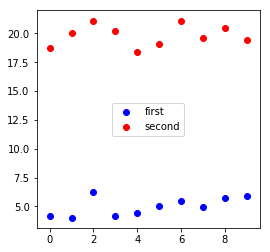

In [3]:
class_0_size = 10
class_1_size = 10
num_classes = 2
X = np.concatenate((np.random.normal(5,1,class_0_size),np.random.normal(20,1,class_1_size)),axis=0)
Y = np.concatenate(([0]*class_0_size,[1]*class_1_size))
print("X=",X)
print("Y=",Y)
colors = ['red','blue']
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

ax1.scatter(np.arange(0,class_0_size), X[:class_0_size], c='b', label='first')
ax1.scatter(np.arange(0,class_1_size), X[class_0_size:], c='r', label='second')
plt.legend(loc='center');
plt.show()

In [4]:
Y_0_mean = np.mean(X[:class_0_size])
Y_1_mean = np.mean(X[class_0_size:])
print("Y_0_mean=", Y_0_mean, " Y_1_mean=",Y_1_mean)

Y_0_mean= 5.0097832487399625  Y_1_mean= 19.815338060887395


In [5]:
P_Y_0 = class_0_size/(class_0_size+class_1_size)
P_Y_1 = class_1_size/(class_0_size+class_1_size)

X_0_mean = np.mean(X[:class_0_size])
X_1_mean = np.mean(X[class_0_size:]);

X_0_m_mean = np.subtract(X[:class_0_size],X_0_mean)
X_1_m_mean = np.subtract(X[class_0_size:],X_1_mean)
variance = np.sum([np.sum(X_0_m_mean**2),np.sum(X_1_m_mean**2)])/(class_0_size+class_1_size-num_classes)
print("sigma^2=",variance)

sigma^2= 0.7549953126132676


In [6]:
def prediction(x, mean, variance, probability):
    return np.add(x*mean/variance-mean**2/(2*variance),np.log(probability))

In [7]:
#predictions on training data
pred_Y_0 = prediction(X,X_0_mean,variance,P_Y_0)
pred_Y_1 = prediction(X,X_1_mean,variance,P_Y_1)
print(pred_Y_0)
print(pred_Y_1)
Y_p = []
for y0,y1 in zip(pred_Y_0,pred_Y_1):
    if y0 > y1:
        Y_p.append(0)
    else:
        Y_p.append(1)
print(Y_p)

[ 10.61367233   9.321032    24.15549389  10.38700602  11.97995792
  15.94014594  19.04150824  15.24852623  20.7923026   21.80135997
 106.97246071 115.39132881 122.78332243 116.90592752 105.00890676
 109.05905314 122.6799793  112.65226067 118.4882774  111.76440214]
[-150.26162173 -155.37443875  -96.69927004 -151.15816141 -144.85751348
 -129.19366927 -116.92676282 -131.92925234 -110.00179613 -106.01064283
  230.86903245  264.16842074  293.40618315  270.15915605  223.10253172
  239.12219081  292.99742714  253.33450666  276.41786949  249.8227346 ]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
#preditions on different dataset
X = np.concatenate((np.random.normal(5,1,class_0_size),np.random.normal(20,1,class_1_size)),axis=0)
pred_Y_0 = prediction(X,X_0_mean,variance,P_Y_0)
pred_Y_1 = prediction(X,X_1_mean,variance,P_Y_1)
print(pred_Y_0)
print(pred_Y_1)
Y_p = []
for y0,y1 in zip(pred_Y_0,pred_Y_1):
    if y0 > y1:
        Y_p.append(0)
    else:
        Y_p.append(1)
print(Y_p)

[ 10.16555689  14.69969976   8.64725296  15.61569804  25.26956898
  11.02992636  16.91053419  15.45100159  16.95807168  17.60135131
 125.77911647 103.13998223 117.98625794 122.22509572 112.96633575
 113.33870303 121.43005107 129.74177691 107.86767329 118.6624827 ]
[-152.03406544 -134.10004129 -158.03945615 -130.47696725  -92.29273717
 -148.61520033 -125.35546502 -131.12839581 -125.16743867 -122.62305645
  305.25553246  215.71032143  274.43221767  291.19821321  254.57677676
  256.04961164  288.05355051  320.92915591  234.40989223  277.10690869]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
